## Installing the ***Pyspark Lib*** 

In [ ]:
pip install pyspark==3.1.2

### You can install Delta Lake using 
<code>pip install delta-spark</code>
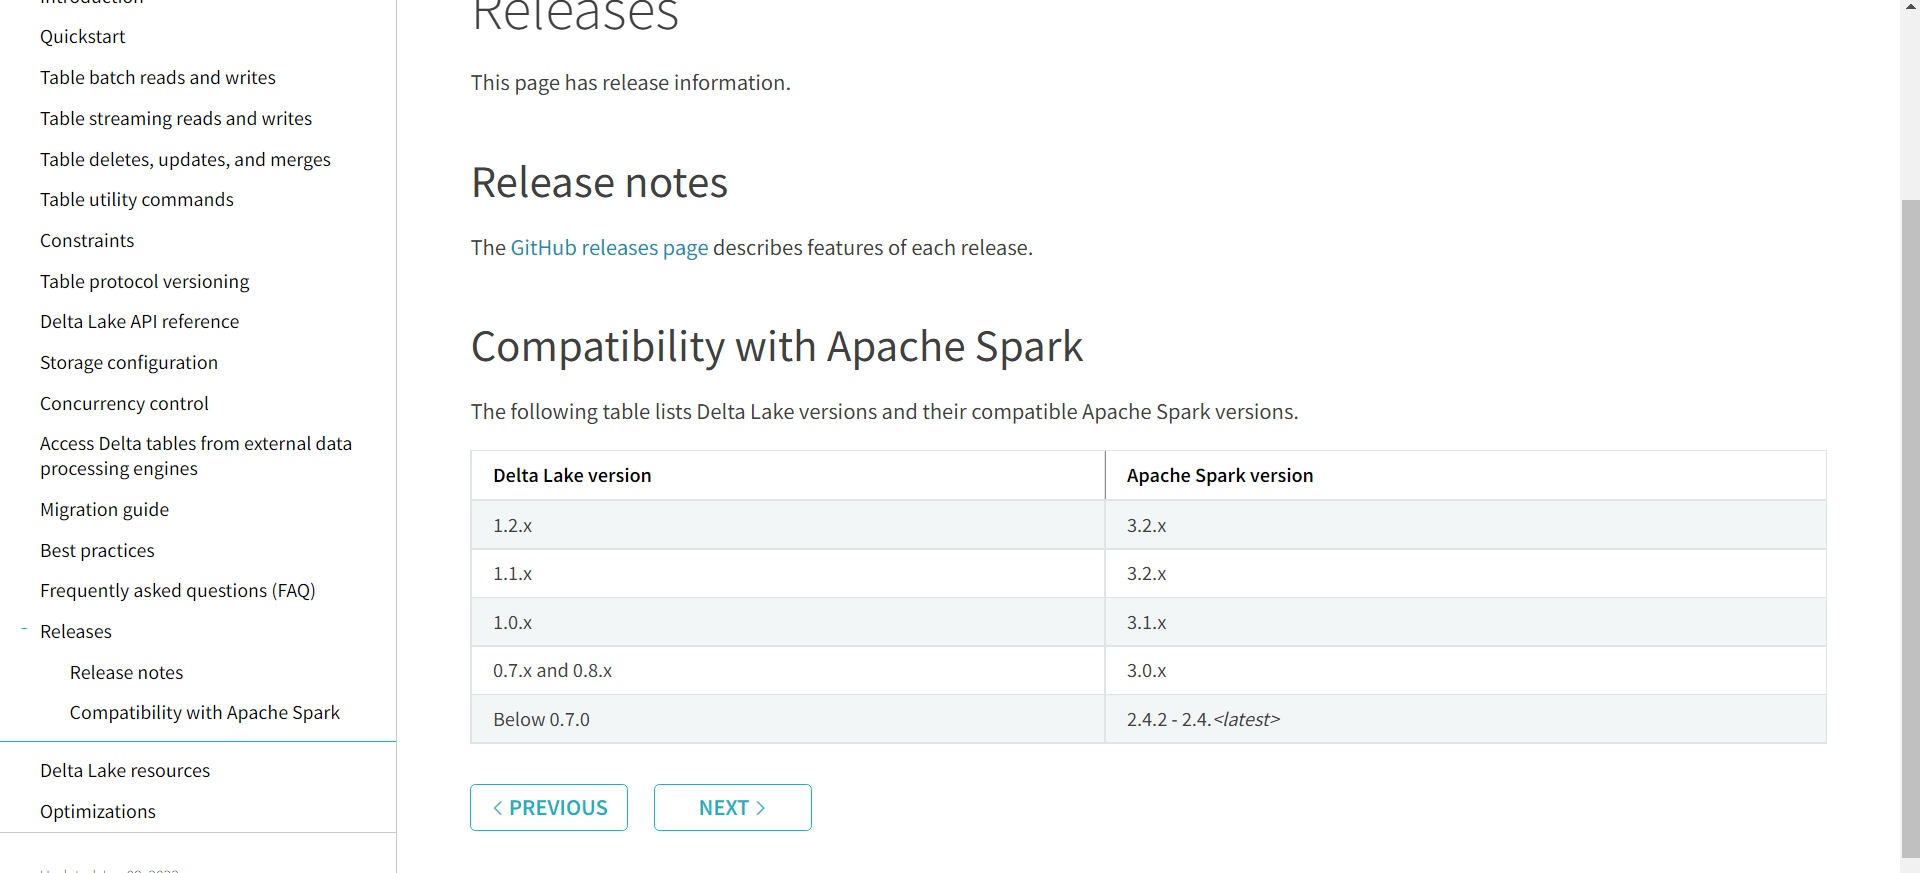

In [ ]:
pip install delta-spark==1.0.1

###### PySpark applications start with initializing `SparkSession` which is the entry point of PySpark as below. In case of running it in PySpark 
###### shell via <code>pyspark</code> executable, the below shell will create a session in the variable <code>spark</code> for users.


#### Configure the SparkSession with the configure_spark_with_delta_pip() utility function in Delta Lake.

In [1]:
import pyspark
from delta import *

builder = pyspark.sql.SparkSession.builder.appName("Apache_Spark_Assignment") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") 

spark = configure_spark_with_delta_pip(builder).enableHiveSupport().getOrCreate()
spark

### Reading the CSV file (people.csv) using Pyspark

In [2]:
# df = spark.read.csv('people.csv',header=True)
df = spark.read.format('csv').load('C:\\Users\\imran\\OneDrive\\Desktop\\Apache\\people.csv')
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string]

In [4]:
df.show() # top rows of DataFrame are displayed 

+---------+--------------------+---------+--------+--------+------------------+-----------------+------------+-------------------+
|      _c0|                 _c1|      _c2|     _c3|     _c4|               _c5|              _c6|         _c7|                _c8|
+---------+--------------------+---------+--------+--------+------------------+-----------------+------------+-------------------+
|person_ID|                name|    first|    last|  middle|             email|            phone|         fax|              title|
|     3130|     Burks, Rosella |  Rosella|   Burks|    null|   BurksR@univ.edu|     963.555.1253|963.777.4065|         Professor |
|     3297|      Avila, Damien |   Damien|   Avila|    null|   AvilaD@univ.edu|     963.555.1352|963.777.7914|         Professor |
|     3547|       Olsen, Robin |    Robin|   Olsen|    null|   OlsenR@univ.edu|     963.555.1378|963.777.9262|Assistant Professor|
|     1538| Moises, Edgar Estes|    Edgar|  Moises|   Estes|  MoisesE@univ.edu|963.

In [5]:
df.printSchema()  # All columns are of type string

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)



In [8]:
df.describe().show()  # summary/ statistical analysis of df


+-------+-----------------+------------+-----+------+------+----------------+------------+------------+-------------------+
|summary|              _c0|         _c1|  _c2|   _c3|   _c4|             _c5|         _c6|         _c7|                _c8|
+-------+-----------------+------------+-----+------+------+----------------+------------+------------+-------------------+
|  count|               41|          41|   41|    41|    16|              41|          41|          41|                 41|
|   mean|         2702.475|        null| null|  null|  null|            null|        null|        null|               null|
| stddev|863.1834337987583|        null| null|  null|  null|            null|        null|        null|               null|
|    min|             1089|Austin, Liz | Adam|Austin|Alford|AustinL@univ.edu|963.555.1253|963.777.1015|Assistant Professor|
|    max|        person_ID|        name|first|  last|middle|           email|       phone|         fax|              title|
+-------

In [9]:
df.count() # Number of records

41

#### Writing the dataframe into delta table 

In [14]:
df.write.format('delta').save("/delta/events")

Py4JJavaError: An error occurred while calling o77.save.
: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:645)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1230)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1435)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:493)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1868)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1910)
	at org.apache.hadoop.fs.ChecksumFileSystem.listStatus(ChecksumFileSystem.java:678)
	at org.apache.spark.sql.delta.storage.HadoopFileSystemLogStore.listFrom(HadoopFileSystemLogStore.scala:69)
	at org.apache.spark.sql.delta.storage.DelegatingLogStore.listFrom(DelegatingLogStore.scala:96)
	at org.apache.spark.sql.delta.SnapshotManagement.listFrom(SnapshotManagement.scala:64)
	at org.apache.spark.sql.delta.SnapshotManagement.listFrom$(SnapshotManagement.scala:63)
	at org.apache.spark.sql.delta.DeltaLog.listFrom(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentForVersion(SnapshotManagement.scala:88)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentForVersion$(SnapshotManagement.scala:82)
	at org.apache.spark.sql.delta.DeltaLog.getLogSegmentForVersion(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.$anonfun$updateInternal$1(SnapshotManagement.scala:289)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.DeltaLog.recordOperation(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.DeltaLog.recordDeltaOperation(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.updateInternal(SnapshotManagement.scala:287)
	at org.apache.spark.sql.delta.SnapshotManagement.updateInternal$(SnapshotManagement.scala:286)
	at org.apache.spark.sql.delta.DeltaLog.updateInternal(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.$anonfun$update$1(SnapshotManagement.scala:248)
	at org.apache.spark.sql.delta.DeltaLog.lockInterruptibly(DeltaLog.scala:152)
	at org.apache.spark.sql.delta.SnapshotManagement.update(SnapshotManagement.scala:248)
	at org.apache.spark.sql.delta.SnapshotManagement.update$(SnapshotManagement.scala:244)
	at org.apache.spark.sql.delta.DeltaLog.update(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommit(OptimisticTransaction.scala:691)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommit$(OptimisticTransaction.scala:660)
	at org.apache.spark.sql.delta.OptimisticTransaction.doCommit(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.$anonfun$doCommitRetryIteratively$2(OptimisticTransaction.scala:632)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordDeltaOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.$anonfun$doCommitRetryIteratively$1(OptimisticTransaction.scala:628)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.lockCommitIfEnabled(OptimisticTransaction.scala:610)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommitRetryIteratively(OptimisticTransaction.scala:623)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommitRetryIteratively$(OptimisticTransaction.scala:620)
	at org.apache.spark.sql.delta.OptimisticTransaction.doCommitRetryIteratively(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.$anonfun$commit$1(OptimisticTransaction.scala:476)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordDeltaOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.commit(OptimisticTransaction.scala:427)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.commit$(OptimisticTransaction.scala:425)
	at org.apache.spark.sql.delta.OptimisticTransaction.commit(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.commands.WriteIntoDelta.$anonfun$run$1(WriteIntoDelta.scala:69)
	at org.apache.spark.sql.delta.commands.WriteIntoDelta.$anonfun$run$1$adapted(WriteIntoDelta.scala:65)
	at org.apache.spark.sql.delta.DeltaLog.withNewTransaction(DeltaLog.scala:187)
	at org.apache.spark.sql.delta.commands.WriteIntoDelta.run(WriteIntoDelta.scala:65)
	at org.apache.spark.sql.delta.sources.DeltaDataSource.createRelation(DeltaDataSource.scala:154)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:46)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:70)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:68)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.doExecute(commands.scala:90)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:132)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:131)
	at org.apache.spark.sql.DataFrameWriter.$anonfun$runCommand$1(DataFrameWriter.scala:989)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:989)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:438)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:409)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:293)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)


In [6]:
# Create table in the metastore using DataFrame's schema and write data to it
# df.write.format("delta").saveAsTable("default.people10m")
# os.listdir()
# Create or replace partitioned table with path using DataFrame's schema and write/overwrite data to it
delta_dir_name = "/tmp/delta-table/events"
# df.write.format("delta").saveAsTable('default.events')
df.write.format("delta").save(delta_dir_name)

Py4JJavaError: An error occurred while calling o74.save.
: com.google.common.util.concurrent.ExecutionError: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at com.google.common.cache.LocalCache$Segment.get(LocalCache.java:2261)
	at com.google.common.cache.LocalCache.get(LocalCache.java:4000)
	at com.google.common.cache.LocalCache$LocalManualCache.get(LocalCache.java:4789)
	at org.apache.spark.sql.delta.DeltaLog$.apply(DeltaLog.scala:464)
	at org.apache.spark.sql.delta.DeltaLog$.forTable(DeltaLog.scala:391)
	at org.apache.spark.sql.delta.sources.DeltaDataSource.createRelation(DeltaDataSource.scala:147)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:46)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:70)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:68)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.doExecute(commands.scala:90)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:132)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:131)
	at org.apache.spark.sql.DataFrameWriter.$anonfun$runCommand$1(DataFrameWriter.scala:989)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:989)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:438)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:409)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:293)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:645)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1230)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1435)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:493)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1868)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1910)
	at org.apache.hadoop.fs.ChecksumFileSystem.listStatus(ChecksumFileSystem.java:678)
	at org.apache.spark.sql.delta.storage.HadoopFileSystemLogStore.listFrom(HadoopFileSystemLogStore.scala:69)
	at org.apache.spark.sql.delta.storage.DelegatingLogStore.listFrom(DelegatingLogStore.scala:96)
	at org.apache.spark.sql.delta.SnapshotManagement.listFrom(SnapshotManagement.scala:64)
	at org.apache.spark.sql.delta.SnapshotManagement.listFrom$(SnapshotManagement.scala:63)
	at org.apache.spark.sql.delta.DeltaLog.listFrom(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentForVersion(SnapshotManagement.scala:88)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentForVersion$(SnapshotManagement.scala:82)
	at org.apache.spark.sql.delta.DeltaLog.getLogSegmentForVersion(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentFrom(SnapshotManagement.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentFrom$(SnapshotManagement.scala:57)
	at org.apache.spark.sql.delta.DeltaLog.getLogSegmentFrom(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.getSnapshotAtInit(SnapshotManagement.scala:188)
	at org.apache.spark.sql.delta.SnapshotManagement.getSnapshotAtInit$(SnapshotManagement.scala:186)
	at org.apache.spark.sql.delta.DeltaLog.getSnapshotAtInit(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.$init$(SnapshotManagement.scala:49)
	at org.apache.spark.sql.delta.DeltaLog.<init>(DeltaLog.scala:63)
	at org.apache.spark.sql.delta.DeltaLog$.$anonfun$apply$3(DeltaLog.scala:467)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.allowInvokingTransformsInAnalyzer(AnalysisHelper.scala:221)
	at org.apache.spark.sql.delta.DeltaLog$.$anonfun$apply$2(DeltaLog.scala:467)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.DeltaLog$.recordOperation(DeltaLog.scala:367)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.DeltaLog$.recordDeltaOperation(DeltaLog.scala:367)
	at org.apache.spark.sql.delta.DeltaLog$.$anonfun$apply$1(DeltaLog.scala:466)
	at com.google.common.cache.LocalCache$LocalManualCache$1.load(LocalCache.java:4792)
	at com.google.common.cache.LocalCache$LoadingValueReference.loadFuture(LocalCache.java:3599)
	at com.google.common.cache.LocalCache$Segment.loadSync(LocalCache.java:2379)
	at com.google.common.cache.LocalCache$Segment.lockedGetOrLoad(LocalCache.java:2342)
	at com.google.common.cache.LocalCache$Segment.get(LocalCache.java:2257)
	... 37 more


In [22]:


df.write.format("delta").saveAsTable("default.spark")


Py4JJavaError: An error occurred while calling o91.saveAsTable.
: java.lang.UnsatisfiedLinkError: org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Ljava/lang/String;I)Z
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access0(Native Method)
	at org.apache.hadoop.io.nativeio.NativeIO$Windows.access(NativeIO.java:645)
	at org.apache.hadoop.fs.FileUtil.canRead(FileUtil.java:1230)
	at org.apache.hadoop.fs.FileUtil.list(FileUtil.java:1435)
	at org.apache.hadoop.fs.RawLocalFileSystem.listStatus(RawLocalFileSystem.java:493)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1868)
	at org.apache.hadoop.fs.FileSystem.listStatus(FileSystem.java:1910)
	at org.apache.hadoop.fs.ChecksumFileSystem.listStatus(ChecksumFileSystem.java:678)
	at org.apache.spark.sql.delta.storage.HadoopFileSystemLogStore.listFrom(HadoopFileSystemLogStore.scala:69)
	at org.apache.spark.sql.delta.storage.DelegatingLogStore.listFrom(DelegatingLogStore.scala:96)
	at org.apache.spark.sql.delta.SnapshotManagement.listFrom(SnapshotManagement.scala:64)
	at org.apache.spark.sql.delta.SnapshotManagement.listFrom$(SnapshotManagement.scala:63)
	at org.apache.spark.sql.delta.DeltaLog.listFrom(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentForVersion(SnapshotManagement.scala:88)
	at org.apache.spark.sql.delta.SnapshotManagement.getLogSegmentForVersion$(SnapshotManagement.scala:82)
	at org.apache.spark.sql.delta.DeltaLog.getLogSegmentForVersion(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.$anonfun$updateInternal$1(SnapshotManagement.scala:289)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.DeltaLog.recordOperation(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.DeltaLog.recordDeltaOperation(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.updateInternal(SnapshotManagement.scala:287)
	at org.apache.spark.sql.delta.SnapshotManagement.updateInternal$(SnapshotManagement.scala:286)
	at org.apache.spark.sql.delta.DeltaLog.updateInternal(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.SnapshotManagement.$anonfun$update$1(SnapshotManagement.scala:248)
	at org.apache.spark.sql.delta.DeltaLog.lockInterruptibly(DeltaLog.scala:152)
	at org.apache.spark.sql.delta.SnapshotManagement.update(SnapshotManagement.scala:248)
	at org.apache.spark.sql.delta.SnapshotManagement.update$(SnapshotManagement.scala:244)
	at org.apache.spark.sql.delta.DeltaLog.update(DeltaLog.scala:59)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommit(OptimisticTransaction.scala:691)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommit$(OptimisticTransaction.scala:660)
	at org.apache.spark.sql.delta.OptimisticTransaction.doCommit(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.$anonfun$doCommitRetryIteratively$2(OptimisticTransaction.scala:632)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordDeltaOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.$anonfun$doCommitRetryIteratively$1(OptimisticTransaction.scala:628)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.lockCommitIfEnabled(OptimisticTransaction.scala:610)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommitRetryIteratively(OptimisticTransaction.scala:623)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.doCommitRetryIteratively$(OptimisticTransaction.scala:620)
	at org.apache.spark.sql.delta.OptimisticTransaction.doCommitRetryIteratively(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.$anonfun$commit$1(OptimisticTransaction.scala:476)
	at scala.runtime.java8.JFunction0$mcJ$sp.apply(JFunction0$mcJ$sp.java:23)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.OptimisticTransaction.recordDeltaOperation(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.commit(OptimisticTransaction.scala:427)
	at org.apache.spark.sql.delta.OptimisticTransactionImpl.commit$(OptimisticTransaction.scala:425)
	at org.apache.spark.sql.delta.OptimisticTransaction.commit(OptimisticTransaction.scala:84)
	at org.apache.spark.sql.delta.commands.CreateDeltaTableCommand.$anonfun$run$2(CreateDeltaTableCommand.scala:130)
	at com.databricks.spark.util.DatabricksLogging.recordOperation(DatabricksLogging.scala:77)
	at com.databricks.spark.util.DatabricksLogging.recordOperation$(DatabricksLogging.scala:67)
	at org.apache.spark.sql.delta.commands.CreateDeltaTableCommand.recordOperation(CreateDeltaTableCommand.scala:48)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:106)
	at org.apache.spark.sql.delta.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:91)
	at org.apache.spark.sql.delta.commands.CreateDeltaTableCommand.recordDeltaOperation(CreateDeltaTableCommand.scala:48)
	at org.apache.spark.sql.delta.commands.CreateDeltaTableCommand.run(CreateDeltaTableCommand.scala:104)
	at org.apache.spark.sql.delta.catalog.DeltaCatalog.org$apache$spark$sql$delta$catalog$DeltaCatalog$$createDeltaTable(DeltaCatalog.scala:147)
	at org.apache.spark.sql.delta.catalog.DeltaCatalog$StagedDeltaTableV2.commitStagedChanges(DeltaCatalog.scala:377)
	at org.apache.spark.sql.execution.datasources.v2.TableWriteExecHelper.$anonfun$writeToTable$1(WriteToDataSourceV2Exec.scala:480)
	at org.apache.spark.util.Utils$.tryWithSafeFinallyAndFailureCallbacks(Utils.scala:1473)
	at org.apache.spark.sql.execution.datasources.v2.TableWriteExecHelper.writeToTable(WriteToDataSourceV2Exec.scala:465)
	at org.apache.spark.sql.execution.datasources.v2.TableWriteExecHelper.writeToTable$(WriteToDataSourceV2Exec.scala:460)
	at org.apache.spark.sql.execution.datasources.v2.AtomicCreateTableAsSelectExec.writeToTable(WriteToDataSourceV2Exec.scala:97)
	at org.apache.spark.sql.execution.datasources.v2.AtomicCreateTableAsSelectExec.run(WriteToDataSourceV2Exec.scala:118)
	at org.apache.spark.sql.execution.datasources.v2.V2CommandExec.result$lzycompute(V2CommandExec.scala:40)
	at org.apache.spark.sql.execution.datasources.v2.V2CommandExec.result(V2CommandExec.scala:40)
	at org.apache.spark.sql.execution.datasources.v2.V2CommandExec.doExecute(V2CommandExec.scala:55)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:180)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:218)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:215)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:176)
	at org.apache.spark.sql.execution.QueryExecution.toRdd$lzycompute(QueryExecution.scala:132)
	at org.apache.spark.sql.execution.QueryExecution.toRdd(QueryExecution.scala:131)
	at org.apache.spark.sql.DataFrameWriter.$anonfun$runCommand$1(DataFrameWriter.scala:989)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:989)
	at org.apache.spark.sql.DataFrameWriter.saveAsTable(DataFrameWriter.scala:686)
	at org.apache.spark.sql.DataFrameWriter.saveAsTable(DataFrameWriter.scala:623)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)


#### I couldn't solve the above error I failed in converting the DataFrame to delta table